In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

from mocap import plot_mocap, plot_mocap_polar, read_tsv

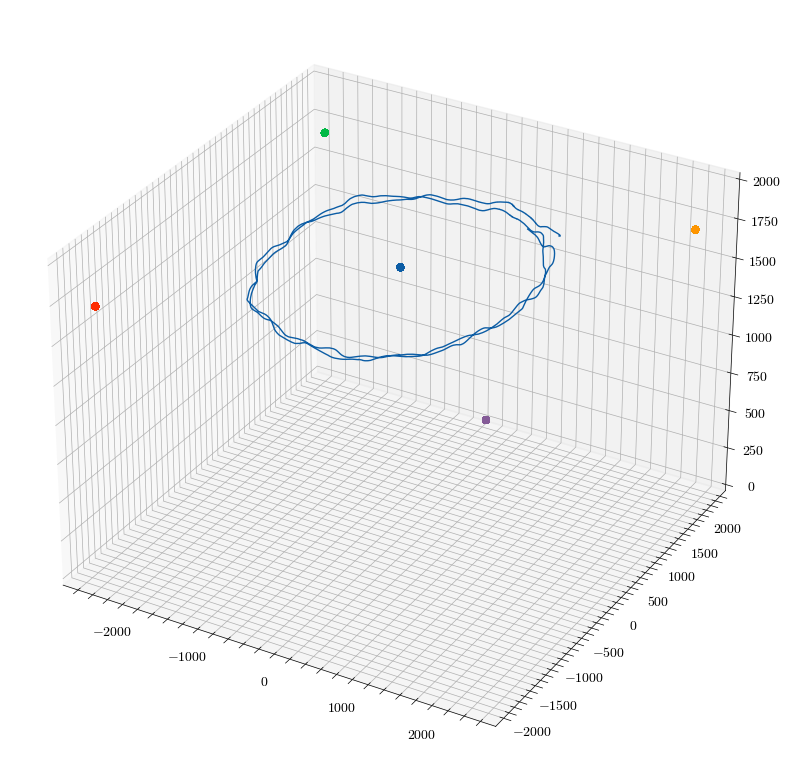

In [3]:
plot_mocap("../Mocap/020623_AmbiREC/Data/Trimmed/trimmed_Movement0016.tsv")

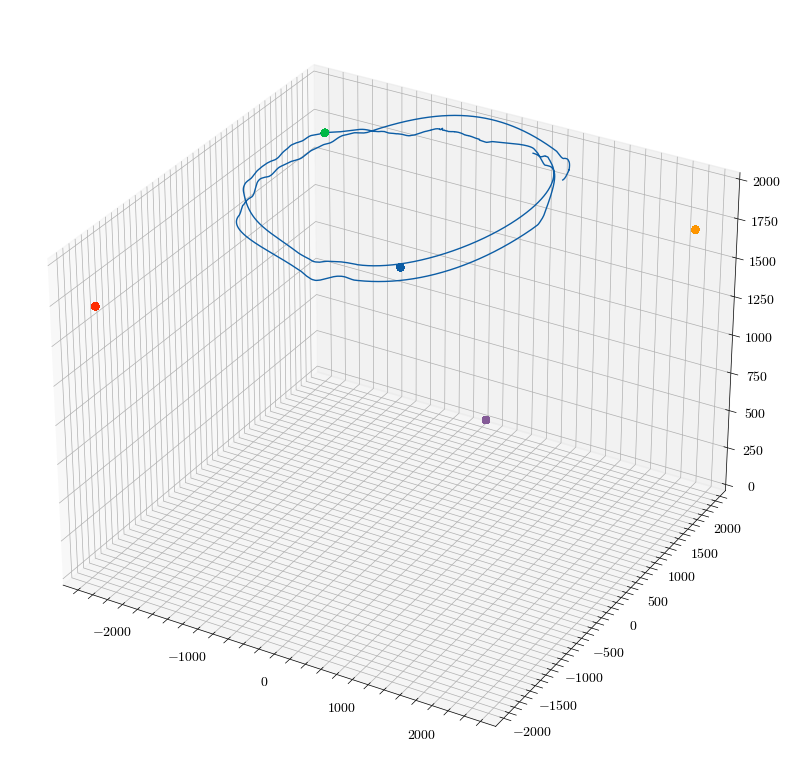

In [5]:
plot_mocap("../Mocap/020623_AmbiREC/Data/Trimmed/trimmed_Movement0018.tsv")

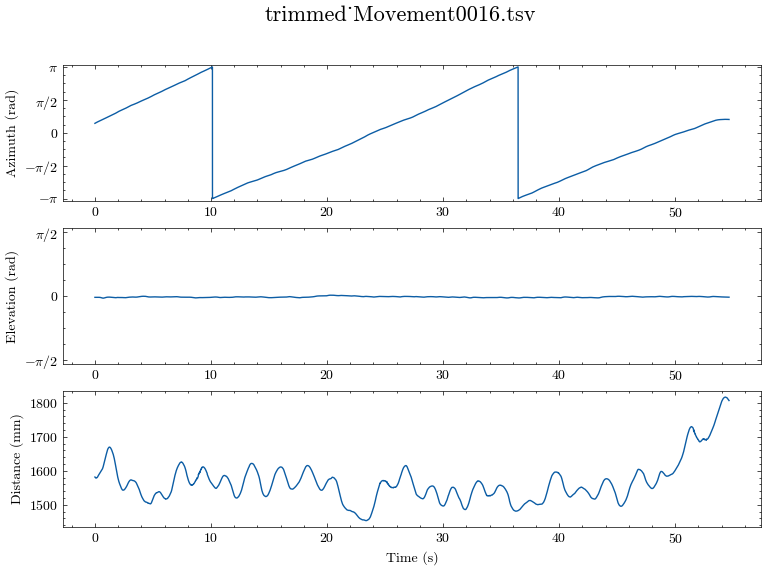

In [3]:
plot_mocap_polar("020623_AmbiREC/Data/Trimmed/trimmed_Movement0016.tsv", "Mic5")

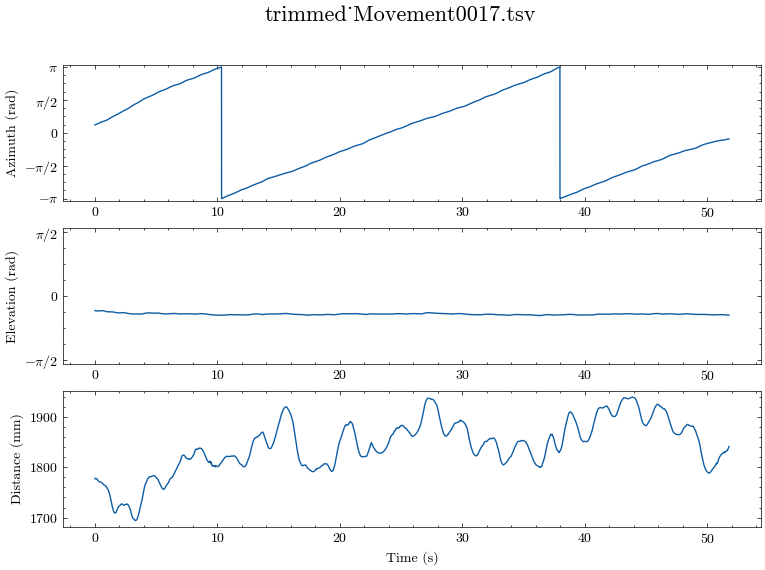

In [4]:
plot_mocap_polar("020623_AmbiREC/Data/Trimmed/trimmed_Movement0017.tsv", "Mic5")

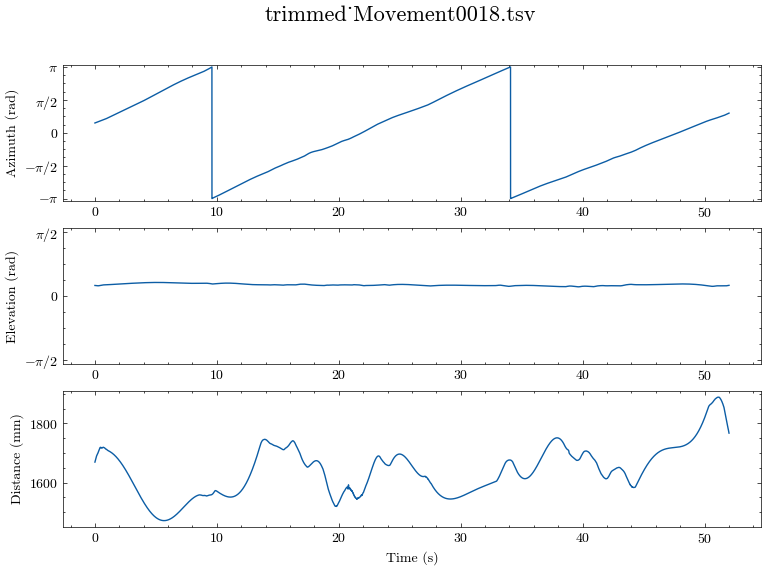

In [9]:
plot_mocap_polar("020623_AmbiREC/Data/Trimmed/trimmed_Movement0018.tsv", "Mic5")

In [13]:
df = read_tsv("020623_AmbiREC/Data/Trimmed/trimmed_Movement0017.tsv")

mic_position = (df[["Center X","Center Y","Center Z",]].to_numpy().mean(axis=0))
source_position = df[["Moving_D X", "Moving_D Y", "Moving_D Z"]].to_numpy()

xyz = source_position - mic_position
x, y, z = xyz[:, 0], xyz[:, 1], xyz[:, 2]

distance = np.sqrt(x**2 + y**2 + z**2)
azimuth = np.arctan2(x, y)  # azimuth = arccot y/x = arctan x/y
elevation_1 = np.arcsin(z / distance)
elevation_2 = np.arctan2(z, np.sqrt(x**2 + y**2))



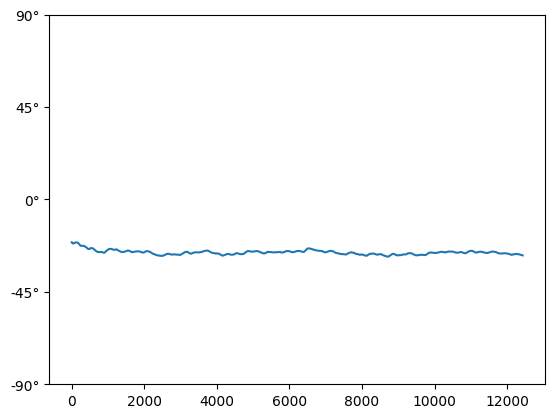

-25.79447702775094


In [24]:
# plt.plot(distance)
plt.plot(elevation_2)
plt.ylim([-np.pi/2, np.pi/2])
plt.yticks([-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2], ["-90°", "-45°", "0°", "45°", "90°"])
# plt.hlines(elevation_2.mean(), 0, len(elevation_2), linestyles='dashed', colors="black")
plt.show()

print(np.rad2deg(elevation_2.mean()))